In [271]:
import json
import pandas as pd
import requests
import config

In [272]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [273]:
#Popularity is calculated by 
# Number of votes for the day
# Number of views for the day
# Number of users who marked it as a "favourite" for the day
# Number of users who added it to their "watchlist" for the day
# Release date
# Number of total votes
# Previous days score

In [274]:
#In the list pages2 I am looping through the URL for each page in the genre 
pages2 = []
for i in range(1,501):
    pages2.append(str(f'https://api.themoviedb.org/3/discover/movie?api_key={config.api_key}&language=en-US&sort_by=popularity.desc&include_adult=false&include_video=false&page={i}&with_genres=12&with_original_language=en'))#I am getting the request for each API URL and adding to a new list.
adv_movies = []
for page in pages2:
    adv_movies.append(requests.get(page))

In [275]:
#I am getting the request for each API URL and adding to a new list.
adv_movies = []
for page in pages2:
    adv_movies.append(requests.get(page))

In [276]:
#From the previous list adv_movies I have sucessfully been approved access and now in the new list adv_json 
#I am converting my data into json file to read the data.
adv_json = []
for movie in adv_movies:
    adv_json.append(movie.json())

In [277]:
#From the previous list that has been converted to a json file, our first three columns were unnecessary information 
#page number,total pages and total movies. We only needed the information in column results therefore we are only
#reaching into the json file and pulling all the information under results.
results = []
for item in adv_json:
    results = results + item['results']

In [278]:
df1 = pd.DataFrame(results)

In [279]:
#I am making the title of the movies as the index to make it easy to read the data frame for the information for each movie
df1.set_index('title', inplace = True)

In [280]:
#I am reseting the index for later when I need to access the column title
df1.reset_index(inplace=True)

In [281]:
df1.head(30)

,title,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,vote_average,overview,release_date
0,Jumanji: The Next Level,295.751,1980,False,/bB42KDdfWkOvmzmYkmK58ZlCa9P.jpg,512200,False,/hreiLoPysWG79TsyQgMzFKaOTF5.jpg,en,Jumanji: The Next Level,"[28, 12, 35, 14]",6.8,As the gang return to Jumanji to rescue one of...,2019-12-04
1,Ad Astra,235.193,2504,False,/xBHvZcjRiWyobQ9kxBhO6B2dtRI.jpg,419704,False,/5BwqwxMEjeFtdknRV792Svo0K1v.jpg,en,Ad Astra,"[12, 18, 9648, 878, 53]",6.0,"The near future, a time when both hope and har...",2019-09-17
2,Frozen II,167.497,2654,False,/pjeMs3yqRmFL3giJy4PMXWZTTPa.jpg,330457,False,/xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg,en,Frozen II,"[12, 16, 10751]",7.1,"Elsa, Anna, Kristoff and Olaf head far into th...",2019-11-20
3,Charlie's Angels,99.344,577,False,/1DPUFG6QnGqzpvEaDEv7TaepycM.jpg,458897,False,/a0xTB1vBxMGt6LGG4N7k1wO9lfL.jpg,en,Charlie's Angels,"[28, 12, 35]",6.4,When a systems engineer blows the whistle on a...,2019-11-14
4,Spies in Disguise,105.707,251,False,/30YacPAcxpNemhhwX0PVUl9pVA3.jpg,431693,False,/qlYxtqVfu2LOdvYMMDPCSGX0Oz0.jpg,en,Spies in Disguise,"[28, 12, 16, 35]",7.2,Super spy Lance Sterling and scientist Walter ...,2019-12-24
5,Avengers: Infinity War,102.134,16915,False,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,299536,False,/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,en,Avengers: Infinity War,"[28, 12, 878]",8.3,As the Avengers and their allies have continue...,2018-04-25
6,The Call of the Wild,83.873,150,False,/33VdppGbeNxICrFUtW2WpGHvfYc.jpg,481848,False,/yFRpUmsreYO5Bc0HVBTsJsHIIox.jpg,en,The Call of the Wild,"[28, 12, 16, 18, 878, 10751]",5.9,Buck is a big-hearted dog whose blissful domes...,2020-02-19
7,Cars,60.620,8782,False,/jpfkzbIXgKZqCZAkEkFH2VYF63s.jpg,920,False,/a1MlbLBk5Sy6YvMbSuKfwGlDVlb.jpg,en,Cars,"[12, 16, 35, 10751]",6.7,"Lightning McQueen, a hotshot rookie race car d...",2006-06-08
8,Onward,77.576,43,False,/3VqDLgKLfNYSQYEGC5sjGhcPhn7.jpg,508439,False,/bcT8CaBIj086WVD7K529h78eujb.jpg,en,Onward,"[12, 16, 35, 14, 10751]",8.1,"In a suburban fantasy world, two teenage elf b...",2020-02-29
9,Star Wars: The Rise of Skywalker,59.436,3074,False,/db32LaOibwEliAmSL2jjDF6oDdj.jpg,181812,False,/jOzrELAzFxtMx2I4uDGHOotdfsS.jpg,en,Star Wars: The Rise of Skywalker,"[28, 12, 878]",6.5,The surviving Resistance faces the First Order...,2019-12-18


In [282]:
df_adv = df1[['title','popularity']].head(20) 
df_adv

,title,popularity
0,Jumanji: The Next Level,295.751
1,Ad Astra,235.193
2,Frozen II,167.497
3,Charlie's Angels,99.344
4,Spies in Disguise,105.707
5,Avengers: Infinity War,102.134
6,The Call of the Wild,83.873
7,Cars,60.620
8,Onward,77.576
9,Star Wars: The Rise of Skywalker,59.436


In [283]:
#Only pulling the popularity column
df_adv['popularity']

0     295.751
1     235.193
2     167.497
3      99.344
4     105.707
5     102.134
6      83.873
7      60.620
8      77.576
9      59.436
10     48.484
11     49.928
12     48.476
13     53.752
14     50.262
15     47.839
16     53.358
17     42.772
18     39.237
19     42.549
Name: popularity, dtype: float64

In [284]:
#Only pulling the title column
df_adv['title']

0                       Jumanji: The Next Level
1                                      Ad Astra
2                                     Frozen II
3                              Charlie's Angels
4                             Spies in Disguise
5                        Avengers: Infinity War
6                          The Call of the Wild
7                                          Cars
8                                        Onward
9              Star Wars: The Rise of Skywalker
10                                       Frozen
11                    Spider-Man: Far from Home
12                 Maleficent: Mistress of Evil
13                                      Aladdin
14                               No Time to Die
15                                The Lion King
16                                     Dolittle
17    The Hobbit: The Battle of the Five Armies
18                           Terminator Genisys
19     Harry Potter and the Philosopher's Stone
Name: title, dtype: object

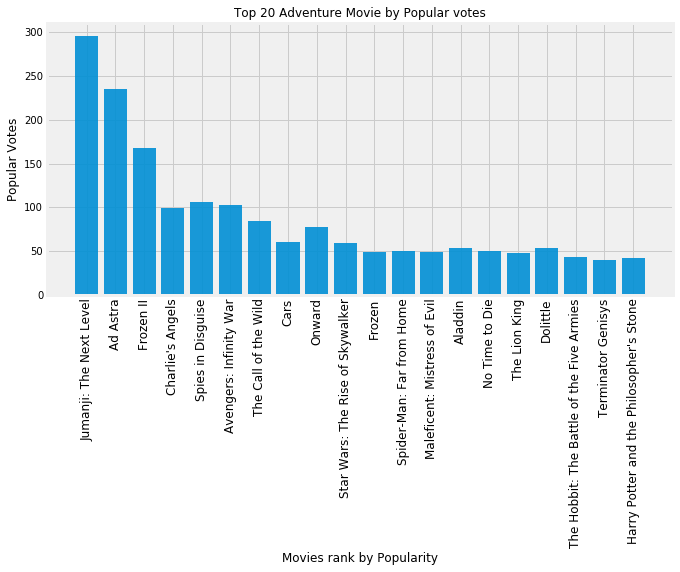

In [285]:
new_figure = plt.figure(figsize= (10,5))
#The list of title is given a new variable 
objects = df_adv['title']

popularity= df_adv['popularity']

plt.bar(objects, popularity, align='center', alpha=.9)
plt.xticks(objects,rotation=90, rotation_mode="default",fontsize=12)
plt.yticks(np.arange(0, 301, step=50))
plt.ylabel('Popular Votes',fontsize=12)
plt.xlabel('Movies rank by Popularity',fontsize=12)
plt.title('Top 20 Adventure Movie by Popular votes',fontsize=12)

plt.show()

In [286]:
#In the list pages3 I am looping through the URL for each page in the genre
pages3 = []
for i in range(1,501):
    pages3.append(str(f'https://api.themoviedb.org/3/discover/movie?api_key={config.api_key}&language=en-US&sort_by=popularity.desc&include_adult=false&include_video=false&page={i}&with_genres=35&with_original_language=en'))

In [287]:
#I am getting the request for each API URL and adding to a new list.
comedy_movies = []
for page in pages3:
    comedy_movies.append(requests.get(page)) 


In [300]:
#From the previous list comedy_movies I have sucessfully been approved access and now in the new list _json
#I am converting my data into json file to read the data
comedy_json = []
for movie in comedy_movies:
    comedy_json.append(movie.json())


In [306]:
results = []
for item in comedy_json:
    results = results + item['results']

In [307]:
df2 = pd.DataFrame(results)

In [308]:
df2.set_index('title', inplace = True)

In [309]:
df2.reset_index(inplace=True)

In [310]:

df2.head(30)


,title,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,vote_average,overview,release_date
0,A Rainy Day in New York,1099.847,611,False,/uPGq1mkEXznUpapDmOSxbsybjfp.jpg,475303,False,/6fkqwqLEcDZOEAnBBfKAniwNxtx.jpg,en,A Rainy Day in New York,"[35, 10749]",6.7,Two young people arrive in New York to spend a...,2019-07-26
1,Jumanji: The Next Level,295.751,1980,False,/bB42KDdfWkOvmzmYkmK58ZlCa9P.jpg,512200,False,/hreiLoPysWG79TsyQgMzFKaOTF5.jpg,en,Jumanji: The Next Level,"[28, 12, 35, 14]",6.8,As the gang return to Jumanji to rescue one of...,2019-12-04
2,Sonic the Hedgehog,257.563,591,False,/aQvJ5WPzZgYVDrxLX4R6cLJCEaQ.jpg,454626,False,/qonBhlm0UjuKX2sH7e73pnG0454.jpg,en,Sonic the Hedgehog,"[28, 35, 878, 10751]",7.2,Based on the global blockbuster videogame fran...,2020-02-12
3,Charlie's Angels,99.344,577,False,/1DPUFG6QnGqzpvEaDEv7TaepycM.jpg,458897,False,/a0xTB1vBxMGt6LGG4N7k1wO9lfL.jpg,en,Charlie's Angels,"[28, 12, 35]",6.4,When a systems engineer blows the whistle on a...,2019-11-14
4,Knives Out,87.939,2515,False,/pThyQovXQrw2m0s9x82twj48Jq4.jpg,546554,False,/cjTQSwcsfVdirSFSHNBXRGkxmWa.jpg,en,Knives Out,"[35, 80, 18, 9648, 53]",7.8,When renowned crime novelist Harlan Thrombey i...,2019-11-27
5,Spies in Disguise,105.707,251,False,/30YacPAcxpNemhhwX0PVUl9pVA3.jpg,431693,False,/qlYxtqVfu2LOdvYMMDPCSGX0Oz0.jpg,en,Spies in Disguise,"[28, 12, 16, 35]",7.2,Super spy Lance Sterling and scientist Walter ...,2019-12-24
6,Guns Akimbo,76.254,52,False,/2kNnf7BwRCEm4bcFkdiE0T4U25s.jpg,457335,False,/gL7TV2g9y9p3v7occ5bLrJ2p1qs.jpg,en,Guns Akimbo,"[28, 35]",6.2,An ordinary guy suddenly finds himself forced ...,2020-02-27
7,Birds of Prey (and the Fantabulous Emancipatio...,130.236,946,False,/h4VB6m0RwcicVEZvzftYZyKXs6K.jpg,495764,False,/uozb2VeD87YmhoUP1RrGWfzuCrr.jpg,en,Birds of Prey (and the Fantabulous Emancipatio...,"[28, 35, 80]",6.8,"After her breakup with the Joker, Harley Quinn...",2020-02-05
8,Jojo Rabbit,66.462,2241,False,/7GsM4mtM0worCtIVeiQt28HieeN.jpg,515001,False,/agoBZfL1q5G79SD0npArSlJn8BH.jpg,en,Jojo Rabbit,"[35, 18, 10752]",8.1,A World War II satire that follows a lonely Ge...,2019-10-18
9,Cars,60.620,8782,False,/jpfkzbIXgKZqCZAkEkFH2VYF63s.jpg,920,False,/a1MlbLBk5Sy6YvMbSuKfwGlDVlb.jpg,en,Cars,"[12, 16, 35, 10751]",6.7,"Lightning McQueen, a hotshot rookie race car d...",2006-06-08


In [311]:
df2.drop(df2[df2['popularity'] > 1000.0].index, inplace = True)

In [312]:
df_com = df2[['title','popularity']].head(20) 
df_com

,title,popularity
1,Jumanji: The Next Level,295.751
2,Sonic the Hedgehog,257.563
3,Charlie's Angels,99.344
4,Knives Out,87.939
5,Spies in Disguise,105.707
6,Guns Akimbo,76.254
7,Birds of Prey (and the Fantabulous Emancipatio...,130.236
8,Jojo Rabbit,66.462
9,Cars,60.620
10,Onward,77.576


In [313]:
df_com.describe()

,popularity
count,20.000000
mean,86.773850
std,69.644828
min,39.562000
25%,48.235500
50%,59.687500
75%,90.790250
max,295.751000


In [314]:
df_com['popularity']

1     295.751
2     257.563
3      99.344
4      87.939
5     105.707
6      76.254
7     130.236
8      66.462
9      60.620
10     77.576
11     41.235
12     58.755
13     39.562
14     48.847
15     53.752
16     53.358
17     53.972
18     42.061
19     46.401
20     40.082
Name: popularity, dtype: float64

In [315]:
df_com['title']


1                               Jumanji: The Next Level
2                                    Sonic the Hedgehog
3                                      Charlie's Angels
4                                            Knives Out
5                                     Spies in Disguise
6                                           Guns Akimbo
7     Birds of Prey (and the Fantabulous Emancipatio...
8                                           Jojo Rabbit
9                                                  Cars
10                                               Onward
11                               Zombieland: Double Tap
12                       Once Upon a Time… in Hollywood
13                                             Hustlers
14                                    The Addams Family
15                                              Aladdin
16                                             Dolittle
17                    To All the Boys I've Loved Before
18                Fast & Furious Presents: Hobbs

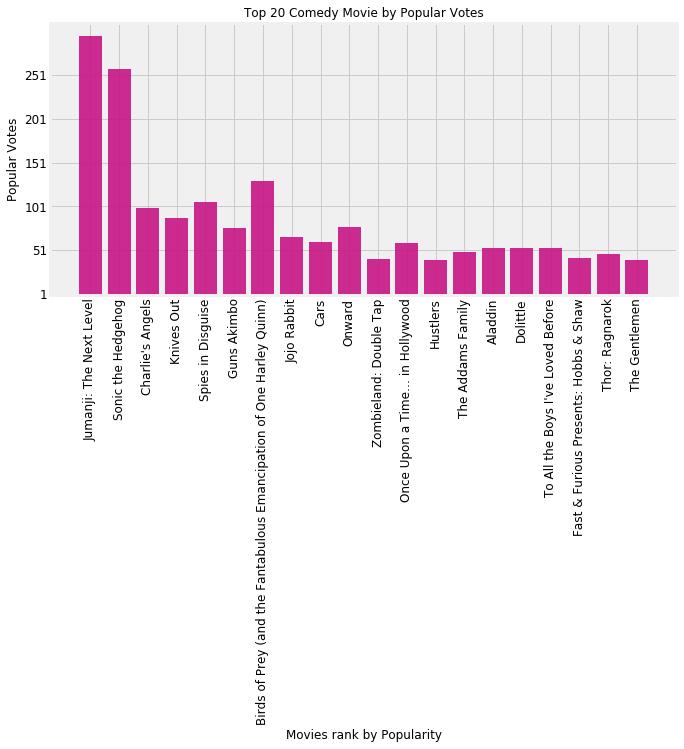

In [393]:
new_figure = plt.figure(figsize= (10,5))
objects = df_com['title']
# y_pos = np.arange(len(objects))
popularity= df_com['popularity']

plt.bar(objects, popularity, align='center', alpha=0.9, color='mediumvioletred')
plt.xticks(objects,rotation=90, rotation_mode="default",fontsize=12)
plt.yticks(np.arange(1, 300, step=50),fontsize=12)
plt.ylabel('Popular Votes',fontsize=12)
plt.xlabel('Movies rank by Popularity',fontsize=12)
plt.title('Top 20 Comedy Movie by Popular Votes',fontsize=12)

plt.show()

## Revenue of Adventure and Comedy Movies Based on Popularity Votes

In [317]:
#In the list revenue_adv I am looping through the URL for each page in the genre. We already sorted each movie by revenue in a desending order.
revenue_adv = []
for i in range(1,20):
    revenue_adv.append(str(f'https://api.themoviedb.org/3/discover/movie?api_key={config.api_key}&language=en-US&sort_by=revenue.desc&page={i}&with_genres=12&with_original_language=en'))
     


In [318]:
# revenue_adv

In [319]:
#I am getting the request for each API URL and adding to a new list.
revenue_movies = []
for page in revenue_adv:
    revenue_movies.append(requests.get(page))

In [320]:
#From the previous list revenue_adv I have sucessfully been approved access and now in the new list revenue_movies 
#I am converting my data into json file to read the data.
revenue_json = []
for movie in revenue_movies:
    revenue_json.append(movie.json())

In [321]:
#From the previous list that has been converted to a json file, our first three columns were unecessary information 
#page number,total pages and total movies. We only needed the information in column results therefore we are only
#reaching into the json file and pulling all the information under revenue_movies = []
results1 = []
for item in revenue_json:
    results1 = results1 + item['results']

In [322]:
df3 = pd.DataFrame(results1)

In [323]:
df3.set_index('title', inplace = True)
#I am making title the index because the column title is now the first column and it makes it easier to read the dataframe. 

In [324]:
df3.reset_index(inplace=True)
#I reset the index for when I need to access the column title because it is not possible to access an index. 

In [325]:
df3.drop(df3[df3['popularity'] < 5.0].index, inplace = True)
# I had dropped Spiderman Triology because the popular vote was less than 1.0, as TMDB grouped all three SpiderMan movies
#into one category and added the revenue for the triology and but the popular vote is low as no one searches for the triology specifically. 

In [326]:
df3.head(20)

,title,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,vote_average,overview,release_date
0,Avengers: Endgame,60.263,11429,False,/or06FN3Dka5tukK1e9sl16pB3iy.jpg,299534,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,en,Avengers: Endgame,"[28, 12, 878]",8.3,After the devastating events of Avengers: Infi...,2019-04-24
1,Avatar,30.910,20405,False,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg,19995,False,/aHcth2AXzZSjhX7JYh7ie73YVNc.jpg,en,Avatar,"[28, 12, 14, 878]",7.4,"In the 22nd century, a paraplegic Marine is di...",2009-12-10
3,Star Wars: The Force Awakens,33.475,13874,False,/weUSwMdQIa3NaXVzwUoIIcAi85d.jpg,140607,False,/c2Ax8Rox5g6CneChwy1gmu4UbSb.jpg,en,Star Wars: The Force Awakens,"[28, 12, 14, 878]",7.4,Thirty years after defeating the Galactic Empi...,2015-12-15
4,Avengers: Infinity War,102.134,16915,False,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,299536,False,/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,en,Avengers: Infinity War,"[28, 12, 878]",8.3,As the Avengers and their allies have continue...,2018-04-25
5,Jurassic World,25.096,15093,False,/jjBgi2r5cRt36xF6iNUEhzscEcb.jpg,135397,False,/t5KONotASgVKq4N19RyhIthWOPG.jpg,en,Jurassic World,"[28, 12, 878, 53]",6.6,Twenty-two years after the events of Jurassic ...,2015-06-06
6,The Lion King,47.839,4593,False,/2bXbqYdUdNVa8VIWXVfclP2ICtT.jpg,420818,False,/nRXO2SnOA75OsWhNhXstHB8ZmI3.jpg,en,The Lion King,"[12, 10751]",7.1,"Simba idolizes his father, King Mufasa, and ta...",2019-07-12
7,The Avengers,36.001,21598,False,/cezWGskPY5x7GaglTTRN4Fugfb8.jpg,24428,False,/hbn46fQaRmlpBuUrEiFqv0GDL6Y.jpg,en,The Avengers,"[28, 12, 878]",7.7,When an unexpected enemy emerges and threatens...,2012-04-25
8,Avengers: Age of Ultron,37.723,15103,False,/t90Y3G8UGQp0f0DrP60wRu9gfrH.jpg,99861,False,/rFtsE7Lhlc2jRWF7SRAU0fvrveQ.jpg,en,Avengers: Age of Ultron,"[28, 12, 878]",7.3,When Tony Stark tries to jumpstart a dormant p...,2015-04-22
9,Black Panther,41.837,14346,False,/uxzzxijgPIY7slzFvMotPv8wjKA.jpg,284054,False,/6ELJEzQJ3Y45HczvreC3dg0GV5R.jpg,en,Black Panther,"[28, 12, 14, 878]",7.4,King T'Challa returns home from America to the...,2018-02-13
10,Harry Potter and the Deathly Hallows: Part 2,29.928,12954,False,/fTplI1NCSuEDP4ITLcTps739fcC.jpg,12445,False,/n5A7brJCjejceZmHyujwUTVgQNC.jpg,en,Harry Potter and the Deathly Hallows: Part 2,"[12, 14]",8.1,"Harry, Ron and Hermione continue their quest t...",2011-07-07


In [327]:
df3.shape

(367, 14)

In [328]:
type(df3['id'])

pandas.core.series.Series

In [329]:
df_rev = df3[['title','popularity']].head(20) 
df_rev
#Making a new dataframe to only pull title and popularity. 

,title,popularity
0,Avengers: Endgame,60.263
1,Avatar,30.910
3,Star Wars: The Force Awakens,33.475
4,Avengers: Infinity War,102.134
5,Jurassic World,25.096
6,The Lion King,47.839
7,The Avengers,36.001
8,Avengers: Age of Ultron,37.723
9,Black Panther,41.837
10,Harry Potter and the Deathly Hallows: Part 2,29.928


In [330]:
df_rev.describe()

,popularity
count,20.000000
mean,45.919350
std,34.038289
min,12.327000
25%,29.336750
50%,36.862000
75%,48.000250
max,167.497000


In [331]:
df_rev['popularity']

0      60.263
1      30.910
3      33.475
4     102.134
5      25.096
6      47.839
7      36.001
8      37.723
9      41.837
10     29.928
11     44.003
12    167.497
13     32.984
14     48.484
15     26.831
16     22.086
17     12.327
18     41.478
19     27.563
20     49.928
Name: popularity, dtype: float64

In [332]:
df_rev['title']

0                                Avengers: Endgame
1                                           Avatar
3                     Star Wars: The Force Awakens
4                           Avengers: Infinity War
5                                   Jurassic World
6                                    The Lion King
7                                     The Avengers
8                          Avengers: Age of Ultron
9                                    Black Panther
10    Harry Potter and the Deathly Hallows: Part 2
11                        Star Wars: The Last Jedi
12                                       Frozen II
13                  Jurassic World: Fallen Kingdom
14                                          Frozen
15                                   Incredibles 2
16                                      Iron Man 3
17                                         Minions
18                      Captain America: Civil War
19                                         Aquaman
20                       Spider

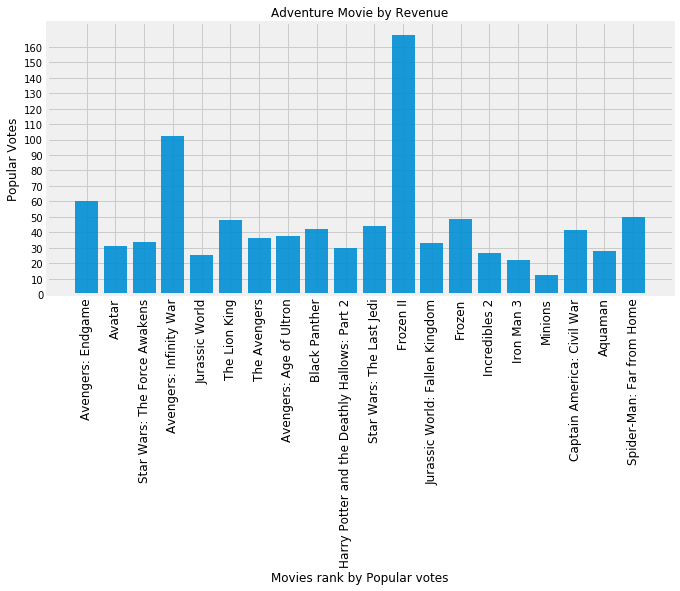

In [333]:
new_figure = plt.figure(figsize= (10,5))
objects = df_rev['title']
popularity= df_rev['popularity']

plt.bar(objects, popularity, align='center', alpha=0.9)
plt.xticks(objects,rotation=90, rotation_mode="default", fontsize=12)
plt.yticks(np.arange(0, 170, step=10))
plt.ylabel('Popular Votes',fontsize=12)
plt.xlabel('Movies rank by Popular votes',fontsize=12)
plt.title('Adventure Movie by Revenue',fontsize=12)

plt.show()


In [334]:

#In the list revenue_com I am looping through the URL for each page in the genre. We already sorted by revenue in a desending order

revenue_com = []
for i in range(1,20):
    revenue_com.append(str(f'https://api.themoviedb.org/3/discover/movie?api_key={config.api_key}&language=en-US&sort_by=revenue.desc&page={i}&with_genres=35&with_original_language=en'))

In [335]:
#I am getting the request for each API URL and adding to a new list.
revenue_moviescom = []
for page in revenue_com:
    revenue_moviescom.append(requests.get(page))

In [336]:
#From the previous list adv_movies I have sucessfully been approved access and now in the new list revenue_moviescom.
#I am converting my data into json file to read the data.
revenuecom_moviecom= []
for movie in revenue_moviescom:
    revenuecom_json.append(movie.json())

In [337]:
#From the previous list that has been converted to a json file, our first three columns were unnecessary information 
#page number,total pages and total movies. We only needed the information in column results therefore we are only
#reaching into the json file and pulling all the information under results.
results1 = []
for item in revenuecom_json:
    results1 = results1 + item['results']

In [338]:
df4 = pd.DataFrame(results1)
df4

,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,title,vote_average,overview,release_date
0,12.327,7782,False,/q0R4crx2SehcEEQEkYObktdeFy.jpg,211672,False,/wiSIfl9FnXYGXzUKji7Muc3Oj3o.jpg,en,Minions,"[12, 16, 35, 10751]",Minions,6.3,"Minions Stuart, Kevin and Bob are recruited by...",2015-06-17
1,35.065,3780,False,/w9kR8qbmQ01HwnvK4alvnQ2ca0L.jpg,301528,False,/m67smI1IIMmYzCl9axvKNULVKLr.jpg,en,Toy Story 4,"[12, 16, 35, 14, 10751]",Toy Story 4,7.5,Woody has always been confident about his plac...,2019-06-19
2,24.846,9660,False,/mMltbSxwEdNE4Cv8QYLpzkHWTDo.jpg,10193,False,/y2qAjM37QgatWeG84DDtwsZuMW.jpg,en,Toy Story 3,"[16, 35, 10751]",Toy Story 3,7.8,"Woody, Buzz, and the rest of Andy's toys haven...",2010-06-16
3,53.752,4939,False,/3iYQTLGoy7QnjcUYRJy4YrAgGvp.jpg,420817,False,/rVqY0Bo4Npf6EIONUROxjYAJfmD.jpg,en,Aladdin,"[12, 35, 14, 10749, 10751]",Aladdin,7.0,A kindhearted street urchin named Aladdin emba...,2019-05-22
4,14.967,4566,False,/6t3YWl7hrr88lCEFlGVqW5yV99R.jpg,324852,False,/ftRkFtAGuHngHnLiOxktq0aCVMF.jpg,en,Despicable Me 3,"[28, 12, 16, 35, 10751]",Despicable Me 3,6.3,Gru and his wife Lucy must stop former '80s ch...,2017-06-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,10.805,2073,False,/cCglgzP9hXrqPqUMGNzISZrK338.jpg,2280,False,/tVpkaXfP5xCS2Fd19JijUSDvpbg.jpg,en,Big,"[35, 18, 14, 10749, 10751]",Big,7.1,When a young boy makes a wish at a carnival ma...,1988-06-03
1516,8.109,1010,False,/9XJ1RICUVM8nxSHFphl5c6ZyQtH.jpg,208134,False,/qPxbuKexc8842G6rPrQb3PV9cKq.jpg,en,Jackass Presents: Bad Grandpa,[35],Jackass Presents: Bad Grandpa,6.0,86-year-old Irving Zisman is on a journey acro...,2013-10-22
1517,12.511,469,False,/b5Xn7UQf7s6ZPsDTVT0NeLqiiHY.jpg,218836,False,/3MET6hEfk8n8i0KFRq9BHnJq7ju.jpg,en,Planes: Fire & Rescue,"[12, 16, 35, 10751]",Planes: Fire & Rescue,6.0,When world-famous air racer Dusty learns that ...,2014-07-17
1518,14.673,4546,False,/xxSopLYATHXSepXcEaBh9Gazv6p.jpg,59436,False,/7sIDEHnw51k7Him2fEtA70I1OBw.jpg,en,Midnight in Paris,"[35, 14, 10749]",Midnight in Paris,7.5,A romantic comedy about a family traveling to ...,2011-05-11


In [339]:
df4.set_index('title', inplace = True)
#Bringing the column title to the front to make it easier to read the data. 

In [340]:
df4.reset_index(inplace=True)
#Resetting the data for when we need to access the column title as it is not possible to access the index.

In [341]:
df4

,title,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,vote_average,overview,release_date
0,Minions,12.327,7782,False,/q0R4crx2SehcEEQEkYObktdeFy.jpg,211672,False,/wiSIfl9FnXYGXzUKji7Muc3Oj3o.jpg,en,Minions,"[12, 16, 35, 10751]",6.3,"Minions Stuart, Kevin and Bob are recruited by...",2015-06-17
1,Toy Story 4,35.065,3780,False,/w9kR8qbmQ01HwnvK4alvnQ2ca0L.jpg,301528,False,/m67smI1IIMmYzCl9axvKNULVKLr.jpg,en,Toy Story 4,"[12, 16, 35, 14, 10751]",7.5,Woody has always been confident about his plac...,2019-06-19
2,Toy Story 3,24.846,9660,False,/mMltbSxwEdNE4Cv8QYLpzkHWTDo.jpg,10193,False,/y2qAjM37QgatWeG84DDtwsZuMW.jpg,en,Toy Story 3,"[16, 35, 10751]",7.8,"Woody, Buzz, and the rest of Andy's toys haven...",2010-06-16
3,Aladdin,53.752,4939,False,/3iYQTLGoy7QnjcUYRJy4YrAgGvp.jpg,420817,False,/rVqY0Bo4Npf6EIONUROxjYAJfmD.jpg,en,Aladdin,"[12, 35, 14, 10749, 10751]",7.0,A kindhearted street urchin named Aladdin emba...,2019-05-22
4,Despicable Me 3,14.967,4566,False,/6t3YWl7hrr88lCEFlGVqW5yV99R.jpg,324852,False,/ftRkFtAGuHngHnLiOxktq0aCVMF.jpg,en,Despicable Me 3,"[28, 12, 16, 35, 10751]",6.3,Gru and his wife Lucy must stop former '80s ch...,2017-06-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,Big,10.805,2073,False,/cCglgzP9hXrqPqUMGNzISZrK338.jpg,2280,False,/tVpkaXfP5xCS2Fd19JijUSDvpbg.jpg,en,Big,"[35, 18, 14, 10749, 10751]",7.1,When a young boy makes a wish at a carnival ma...,1988-06-03
1516,Jackass Presents: Bad Grandpa,8.109,1010,False,/9XJ1RICUVM8nxSHFphl5c6ZyQtH.jpg,208134,False,/qPxbuKexc8842G6rPrQb3PV9cKq.jpg,en,Jackass Presents: Bad Grandpa,[35],6.0,86-year-old Irving Zisman is on a journey acro...,2013-10-22
1517,Planes: Fire & Rescue,12.511,469,False,/b5Xn7UQf7s6ZPsDTVT0NeLqiiHY.jpg,218836,False,/3MET6hEfk8n8i0KFRq9BHnJq7ju.jpg,en,Planes: Fire & Rescue,"[12, 16, 35, 10751]",6.0,When world-famous air racer Dusty learns that ...,2014-07-17
1518,Midnight in Paris,14.673,4546,False,/xxSopLYATHXSepXcEaBh9Gazv6p.jpg,59436,False,/7sIDEHnw51k7Him2fEtA70I1OBw.jpg,en,Midnight in Paris,"[35, 14, 10749]",7.5,A romantic comedy about a family traveling to ...,2011-05-11


In [342]:
df4.drop(df4[df4['popularity'] > 1000.0].index, inplace = True)
#I had to drop run this code because there was an outlier. The movie A Rainy Day in New York had a popular vote of 1,900. 

In [343]:
#Making a new variable of the first 40 movies to later on access only the id movie codes as a smaller dataset.
df4clean = df4.head(40)


In [344]:
df4.describe()

,popularity,vote_count,id,vote_average
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,17.717267,3538.209211,88031.907895,6.475789
std,21.162816,3019.204554,133170.144175,0.744127
min,0.600000,0.000000,13.000000,0.000000
25%,11.268500,1539.750000,5864.250000,6.000000
50%,13.524000,2481.500000,11462.000000,6.450000
75%,17.715250,4415.000000,111125.500000,6.900000
max,295.751000,21916.000000,546554.000000,8.400000


In [394]:
df_revcom = df4[['title','popularity']].head(21) 
df_revcom
#Making a new dataset for only movie title and popularity. 

,title,popularity
0,Minions,12.327
1,Toy Story 4,35.065
2,Toy Story 3,24.846
3,Aladdin,53.752
4,Despicable Me 3,14.967
5,Finding Dory,17.592
6,Zootopia,42.021
7,In The Mood For Surrealism or 8021,0.600
8,Despicable Me 2,28.910
9,Jumanji: Welcome to the Jungle,29.279


In [395]:
df_revcom.drop(df_revcom[df_revcom['popularity'] < 1].index, inplace = True)

In [396]:
df_revcom.describe()

,popularity
count,20.000000
mean,27.777600
std,12.129956
min,7.147000
25%,18.785500
50%,26.878000
75%,35.113500
max,53.752000


In [397]:
df_revcom['title']

0                                              Minions
1                                          Toy Story 4
2                                          Toy Story 3
3                                              Aladdin
4                                      Despicable Me 3
5                                         Finding Dory
6                                             Zootopia
8                                      Despicable Me 2
9                       Jumanji: Welcome to the Jungle
10                                             Shrek 2
11                      Ice Age: Dawn of the Dinosaurs
12                          Ice Age: Continental Drift
13                             The Secret Life of Pets
14                      Guardians of the Galaxy Vol. 2
15                                          Inside Out
16                                      Thor: Ragnarok
17                                                Coco
18                                     Shrek the Third
19    Pira

In [398]:
df_revcom['popularity']

0     12.327
1     35.065
2     24.846
3     53.752
4     14.967
5     17.592
6     42.021
8     28.910
9     29.279
10    20.999
11    18.812
12    18.858
13     7.147
14    33.765
15    35.259
16    46.401
17    31.771
18    18.706
19    24.398
20    40.677
Name: popularity, dtype: float64

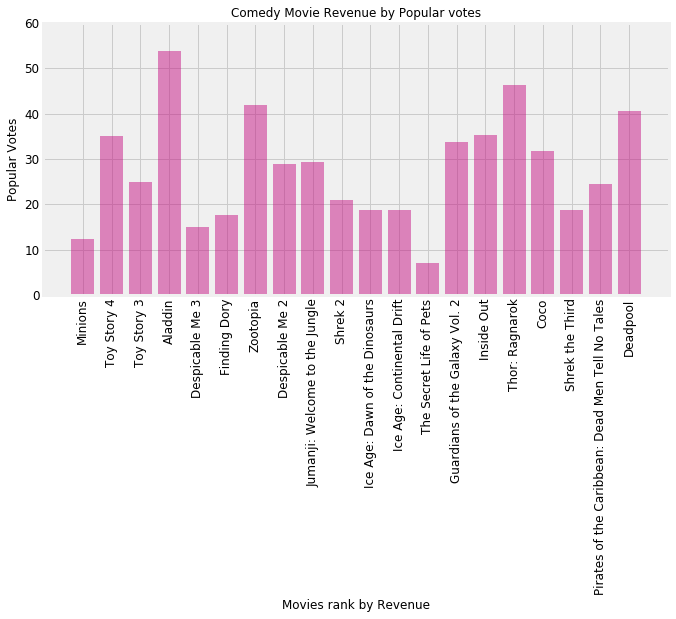

In [399]:
new_figure = plt.figure(figsize= (10,5))
objects = df_revcom['title']
popularity= df_revcom['popularity']

plt.bar(objects, popularity, align='center', alpha=0.5, color='mediumvioletred')
plt.xticks(objects,rotation=90, rotation_mode="default", fontsize= 12)
plt.yticks(np.arange(0, 70, step=10),fontsize= 12)
plt.ylabel('Popular Votes',fontsize= 12)
plt.xlabel('Movies rank by Revenue',fontsize= 12)
plt.title('Comedy Movie Revenue by Popular votes',fontsize= 12)

plt.show()


## Budget of Adventure and Comedy Movies sorted by Highest Revenue

In [400]:
id_list=list(df3['id'].values)

In [355]:
#In the list budget_adv I am looping through the movie id from the df3 to access the movie details. We already sorted by revenue in a desending order based on the order 
#of df3
budget_adv = []
for movieid in id_list:
    budget_adv.append(str(f'https://api.themoviedb.org/3/movie/{movieid}?api_key={config.api_key}&language=en-US'))
   

In [356]:
#budget_adv 

In [357]:
#I am getting the request for each API URL and adding to a new list.

budget_movies = []
for page in budget_adv:
    budget_movies.append(requests.get(page))

In [358]:
#From the previous list budget_movies I have sucessfully been approved access and now in the new list budget_json 
#I am converting my data into json file to read the data.
#reaching into the json file and pulling all the information under results
budget_json = []
for movie in budget_movies:
    budget_json.append(movie.json())

In [359]:
#budget_json

In [360]:
dfbu = pd.DataFrame(budget_json)
#converting to a dataframe

In [361]:
dfbu.set_index('title', inplace = True)

In [362]:
dfbu.reset_index(inplace= True)

In [363]:
#dfbu.drop(columns=['index'] , inplace= True)

In [364]:
dfbu

,title,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
0,Avengers: Endgame,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-04-24,2797800564,181,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Part of the journey is the end.,False,8.3,11426
1,Avatar,False,/aHcth2AXzZSjhX7JYh7ie73YVNc.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,False,7.4,20403
2,Star Wars: The Force Awakens,False,/c2Ax8Rox5g6CneChwy1gmu4UbSb.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,2068223624,136,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every generation has a story.,False,7.4,13874
3,Avengers: Infinity War,False,/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,2046239637,149,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An entire universe. Once and for all.,False,8.3,16915
4,Jurassic World,False,/t5KONotASgVKq4N19RyhIthWOPG.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397,tt0369610,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-06,1671713208,124,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The park is open.,False,6.6,15092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,Storks,False,/yziCg46YIvmWAvPdztuZQqNBinW.jpg,None,70000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.storks-movie.net/,332210,tt4624424,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-09-22,182379278,87,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Find Your Flock,False,6.6,1470
363,Poseidon,False,/tUGSLoMcxNWZ0OIRSqDaB2jNbdE.jpg,None,160000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www2.warnerbros.com/poseidon/,503,tt0409182,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2006-05-10,181674817,99,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Mayday,False,5.7,1176
364,Scooby-Doo 2: Monsters Unleashed,False,/2vRVzvqY0tydcStBkNn73JPPOPL.jpg,"{'id': 86860, 'name': 'Scooby-Doo Collection',...",0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 14, '...",,11024,tt0331632,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2004-03-24,181466833,93,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They came. They saw. They ran.,False,5.7,1472
365,Allegiant,False,/p1dkPKpHJ32FvhKZSAUdA1JSYFi.jpg,"{'id': 283579, 'name': 'Divergent Collection',...",110000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",http://www.thedivergentseries.movie/#allegiant,262504,tt3410834,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-03-09,179246868,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Break the boundaries of your world,False,6.0,4578


In [365]:
adv_budget= dfbu[['title','budget']].head(20)
adv_budget
#Making a new dataframe of only title and budget. 

,title,budget
0,Avengers: Endgame,356000000
1,Avatar,237000000
2,Star Wars: The Force Awakens,245000000
3,Avengers: Infinity War,300000000
4,Jurassic World,150000000
5,The Lion King,260000000
6,The Avengers,220000000
7,Avengers: Age of Ultron,280000000
8,Black Panther,200000000
9,Harry Potter and the Deathly Hallows: Part 2,125000000


In [366]:
adv_budget.describe()

,budget
count,2.000000e+01
mean,1.980000e+08
std,7.544255e+07
min,3.300000e+07
25%,1.575000e+08
50%,2.000000e+08
75%,2.412500e+08
max,3.560000e+08


In [367]:
adv_budget['title']

0                                Avengers: Endgame
1                                           Avatar
2                     Star Wars: The Force Awakens
3                           Avengers: Infinity War
4                                   Jurassic World
5                                    The Lion King
6                                     The Avengers
7                          Avengers: Age of Ultron
8                                    Black Panther
9     Harry Potter and the Deathly Hallows: Part 2
10                        Star Wars: The Last Jedi
11                                       Frozen II
12                  Jurassic World: Fallen Kingdom
13                                          Frozen
14                                   Incredibles 2
15                                      Iron Man 3
16                                         Minions
17                      Captain America: Civil War
18                                         Aquaman
19                       Spider

In [368]:
adv_budget['budget']

0     356000000
1     237000000
2     245000000
3     300000000
4     150000000
5     260000000
6     220000000
7     280000000
8     200000000
9     125000000
10    200000000
11     33000000
12    170000000
13    150000000
14    200000000
15    200000000
16     74000000
17    240000000
18    160000000
19    160000000
Name: budget, dtype: int64

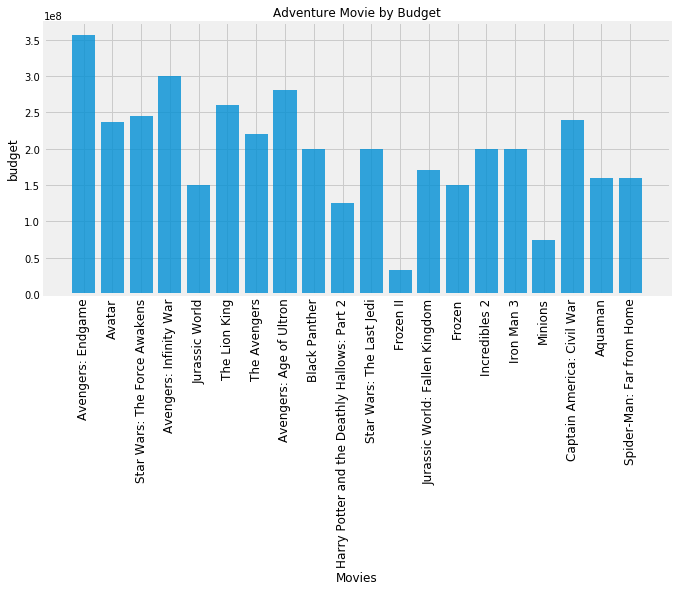

In [369]:
new_figure = plt.figure(figsize= (10,5))
objects = adv_budget['title']
# y_pos = np.arange(len(objects))
budget= adv_budget['budget']

plt.bar(objects, budget, align='center', alpha=0.8)
plt.xticks(objects,rotation=90, rotation_mode="default",fontsize =12)
#plt.yticks(np.arange(0, 356000000)) #step=10000 
plt.ylabel('budget',fontsize =12)
plt.xlabel('Movies',fontsize =12)
plt.title('Adventure Movie by Budget',fontsize =12)

plt.show()

In [370]:
#Making a list of the movie id from the dataframe df4.
id_listcom2=list(df4clean['id'].values)

In [371]:
#In the list budget_adv I am looping through the movie id from the df4 to access the movie details. We already sorted by revenue in a desending order based on the order 
#of df4
budget_com = []
for movieid in id_listcom2:
    budget_com.append(str(f'https://api.themoviedb.org/3/movie/{movieid}?api_key={config.api_key}&language=en-US'))
   

In [372]:
#I am getting the request for each API URL and adding to a new list.
budget_comedymovies = []
for page in budget_com:
    budget_comedymovies.append(requests.get(page))

In [373]:
#From the previous list budget_comedymovies I have sucessfully been approved access and now in the new list budgetcomedy_json 
#I am converting my data into json file to read the data.
budgetcomedy_json = []
for movie in budget_comedymovies:
    budgetcomedy_json.append(movie.json())

In [374]:
dfcomedybudget = pd.DataFrame(budgetcomedy_json)

In [375]:
dfcomedybudget.set_index('title', inplace = True)

In [376]:
dfcomedybudget.reset_index(inplace=True)

In [377]:
dfcomedybudget

,title,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
0,Minions,False,/wiSIfl9FnXYGXzUKji7Muc3Oj3o.jpg,"{'id': 544669, 'name': 'Minions Collection', '...",74000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.minionsmovie.com/,211672,tt2293640,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-17,1156730962,91,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Before Gru, they had a history of bad bosses",False,6.3,7782
1,Toy Story 4,False,/m67smI1IIMmYzCl9axvKNULVKLr.jpg,"{'id': 10194, 'name': 'Toy Story Collection', ...",175000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",https://www.pixar.com/feature-films-toy-story-4,301528,tt1979376,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-06-19,1073394593,100,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Get Ready to Hit the Road,False,7.5,3780
2,Toy Story 3,False,/y2qAjM37QgatWeG84DDtwsZuMW.jpg,"{'id': 10194, 'name': 'Toy Story Collection', ...",200000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/toystory/,10193,tt0435761,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-06-16,1066969703,103,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No toy gets left behind.,False,7.8,9657
3,Aladdin,False,/rVqY0Bo4Npf6EIONUROxjYAJfmD.jpg,None,183000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",https://movies.disney.com/aladdin-2019,420817,tt6139732,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-05-22,1047612394,128,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Choose Wisely.,False,7.0,4939
4,Despicable Me 3,False,/ftRkFtAGuHngHnLiOxktq0aCVMF.jpg,"{'id': 86066, 'name': 'Despicable Me Collectio...",80000000,"[{'id': 28, 'name': 'Action'}, {'id': 16, 'nam...",http://www.despicable.me,324852,tt3469046,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2017-06-15,1031552585,96,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Oh brother.,False,6.3,4566
5,Finding Dory,False,/3iSCdXjDmY3DuEOUYsElu35vQU6.jpg,"{'id': 137697, 'name': 'Finding Nemo Collectio...",200000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://movies.disney.com/finding-dory,127380,tt2277860,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-06-16,1028570889,97,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An unforgettable journey she probably won't re...,False,7.0,8640
6,Zootopia,False,/mhdeE1yShHTaDbJVdWyTlzFvNkr.jpg,None,150000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",http://movies.disney.com/zootopia,269149,tt2948356,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-02-11,1023784195,109,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the urban jungle.,False,7.7,11116
7,In The Mood For Surrealism or 8021,False,None,None,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",None,517141,None,en,...,"[{'iso_3166_1': 'EG', 'name': 'Egypt'}]",2018-04-24,1000000000,2,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,THE SECRET WORLD UNDECIPHERED,False,0.0,0
8,Despicable Me 2,False,/rmgxcw8tGTmdhsWqdjGBS9uI1tO.jpg,"{'id': 86066, 'name': 'Despicable Me Collectio...",76000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://www.despicableme.com/,93456,tt1690953,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2013-06-25,970761885,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Back 2 Work,False,6.9,7993
9,Jumanji: Welcome to the Jungle,False,/rz3TAyd5kmiJmozp3GUbYeB5Kep.jpg,"{'id': 495527, 'name': 'Jumanji Collection', '...",90000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://jumanjimovie.com,353486,tt2283362,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2017-12-09,962102237,119,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The game has evolved.,False,6.7,8616


In [378]:
#I had to drop multiple rows in the dataframe because the budget was 0 therefore
#TMDB did not have the budget 
dfcomedybudget.drop(dfcomedybudget[dfcomedybudget['budget'] < 1].index, inplace = True)

In [379]:
dfcomedybudget

,title,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
0,Minions,False,/wiSIfl9FnXYGXzUKji7Muc3Oj3o.jpg,"{'id': 544669, 'name': 'Minions Collection', '...",74000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.minionsmovie.com/,211672,tt2293640,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-17,1156730962,91,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Before Gru, they had a history of bad bosses",False,6.3,7782
1,Toy Story 4,False,/m67smI1IIMmYzCl9axvKNULVKLr.jpg,"{'id': 10194, 'name': 'Toy Story Collection', ...",175000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",https://www.pixar.com/feature-films-toy-story-4,301528,tt1979376,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-06-19,1073394593,100,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Get Ready to Hit the Road,False,7.5,3780
2,Toy Story 3,False,/y2qAjM37QgatWeG84DDtwsZuMW.jpg,"{'id': 10194, 'name': 'Toy Story Collection', ...",200000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/toystory/,10193,tt0435761,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-06-16,1066969703,103,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No toy gets left behind.,False,7.8,9657
3,Aladdin,False,/rVqY0Bo4Npf6EIONUROxjYAJfmD.jpg,None,183000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",https://movies.disney.com/aladdin-2019,420817,tt6139732,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-05-22,1047612394,128,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Choose Wisely.,False,7.0,4939
4,Despicable Me 3,False,/ftRkFtAGuHngHnLiOxktq0aCVMF.jpg,"{'id': 86066, 'name': 'Despicable Me Collectio...",80000000,"[{'id': 28, 'name': 'Action'}, {'id': 16, 'nam...",http://www.despicable.me,324852,tt3469046,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2017-06-15,1031552585,96,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Oh brother.,False,6.3,4566
5,Finding Dory,False,/3iSCdXjDmY3DuEOUYsElu35vQU6.jpg,"{'id': 137697, 'name': 'Finding Nemo Collectio...",200000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://movies.disney.com/finding-dory,127380,tt2277860,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-06-16,1028570889,97,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An unforgettable journey she probably won't re...,False,7.0,8640
6,Zootopia,False,/mhdeE1yShHTaDbJVdWyTlzFvNkr.jpg,None,150000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",http://movies.disney.com/zootopia,269149,tt2948356,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-02-11,1023784195,109,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the urban jungle.,False,7.7,11116
8,Despicable Me 2,False,/rmgxcw8tGTmdhsWqdjGBS9uI1tO.jpg,"{'id': 86066, 'name': 'Despicable Me Collectio...",76000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://www.despicableme.com/,93456,tt1690953,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2013-06-25,970761885,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Back 2 Work,False,6.9,7993
9,Jumanji: Welcome to the Jungle,False,/rz3TAyd5kmiJmozp3GUbYeB5Kep.jpg,"{'id': 495527, 'name': 'Jumanji Collection', '...",90000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://jumanjimovie.com,353486,tt2283362,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2017-12-09,962102237,119,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The game has evolved.,False,6.7,8616
10,Shrek 2,False,/gdFAYLb5NR5HqcEKnPloOM6fX4B.jpg,"{'id': 2150, 'name': 'Shrek Collection', 'post...",150000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.shrek2.com/,809,tt0298148,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2004-05-19,919838758,93,"[{'iso_639_1': 'en'

In [380]:
dfcomedybudget__ = dfcomedybudget[['title','budget']].head(20) 
dfcomedybudget__ 

,title,budget
0,Minions,74000000
1,Toy Story 4,175000000
2,Toy Story 3,200000000
3,Aladdin,183000000
4,Despicable Me 3,80000000
5,Finding Dory,200000000
6,Zootopia,150000000
8,Despicable Me 2,76000000
9,Jumanji: Welcome to the Jungle,90000000
10,Shrek 2,150000000


In [381]:
dfcomedybudget__.describe()

,budget
count,2.000000e+01
mean,1.408000e+08
std,5.459767e+07
min,5.800000e+07
25%,8.750000e+07
50%,1.550000e+08
75%,1.807500e+08
max,2.300000e+08


In [382]:
dfcomedybudget__['title']

0                                              Minions
1                                          Toy Story 4
2                                          Toy Story 3
3                                              Aladdin
4                                      Despicable Me 3
5                                         Finding Dory
6                                             Zootopia
8                                      Despicable Me 2
9                       Jumanji: Welcome to the Jungle
10                                             Shrek 2
11                      Ice Age: Dawn of the Dinosaurs
12                          Ice Age: Continental Drift
13                             The Secret Life of Pets
14                      Guardians of the Galaxy Vol. 2
15                                          Inside Out
16                                      Thor: Ragnarok
17                                                Coco
18                                     Shrek the Third
19    Pira

In [383]:
dfcomedybudget__['budget']

0      74000000
1     175000000
2     200000000
3     183000000
4      80000000
5     200000000
6     150000000
8      76000000
9      90000000
10    150000000
11     90000000
12     95000000
13     75000000
14    200000000
15    175000000
16    180000000
17    175000000
18    160000000
19    230000000
20     58000000
Name: budget, dtype: int64

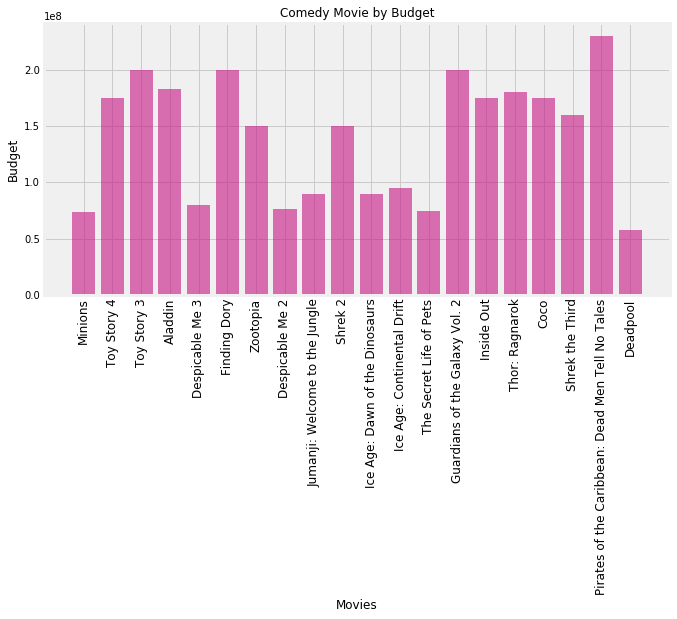

In [384]:
new_figure = plt.figure(figsize= (10,5))
objects = dfcomedybudget__['title']
# y_pos = np.arange(len(objects))
budget= dfcomedybudget__['budget']

plt.bar(objects, budget, align='center', alpha=0.6,color='mediumvioletred')
plt.xticks(objects,rotation=90, rotation_mode="default",fontsize=12)
#plt.yticks(np.arange(0, 356000000)) #step=10000 
plt.ylabel('Budget',fontsize=12)
plt.xlabel('Movies',fontsize=12)
plt.title('Comedy Movie by Budget',fontsize=12)

plt.show()


# Runtime of Adventure and Comedy Movies sorted by Highest Revenue


In [385]:
#From the datafram dfbu I am pulling title column and the runtime of the movies which are sorted by revenue. 
adv_run= dfbu[['title','runtime']].head(20)
adv_run

,title,runtime
0,Avengers: Endgame,181
1,Avatar,162
2,Star Wars: The Force Awakens,136
3,Avengers: Infinity War,149
4,Jurassic World,124
5,The Lion King,118
6,The Avengers,143
7,Avengers: Age of Ultron,141
8,Black Panther,134
9,Harry Potter and the Deathly Hallows: Part 2,130


In [386]:
adv_run['title']

0                                Avengers: Endgame
1                                           Avatar
2                     Star Wars: The Force Awakens
3                           Avengers: Infinity War
4                                   Jurassic World
5                                    The Lion King
6                                     The Avengers
7                          Avengers: Age of Ultron
8                                    Black Panther
9     Harry Potter and the Deathly Hallows: Part 2
10                        Star Wars: The Last Jedi
11                                       Frozen II
12                  Jurassic World: Fallen Kingdom
13                                          Frozen
14                                   Incredibles 2
15                                      Iron Man 3
16                                         Minions
17                      Captain America: Civil War
18                                         Aquaman
19                       Spider

In [387]:
adv_run['runtime']

0     181
1     162
2     136
3     149
4     124
5     118
6     143
7     141
8     134
9     130
10    152
11    104
12    129
13    102
14    118
15    131
16     91
17    147
18    144
19    129
Name: runtime, dtype: int64

In [388]:
adv_run.describe()

,runtime
count,20.000000
mean,133.250000
std,21.018476
min,91.000000
25%,122.500000
50%,132.500000
75%,144.750000
max,181.000000


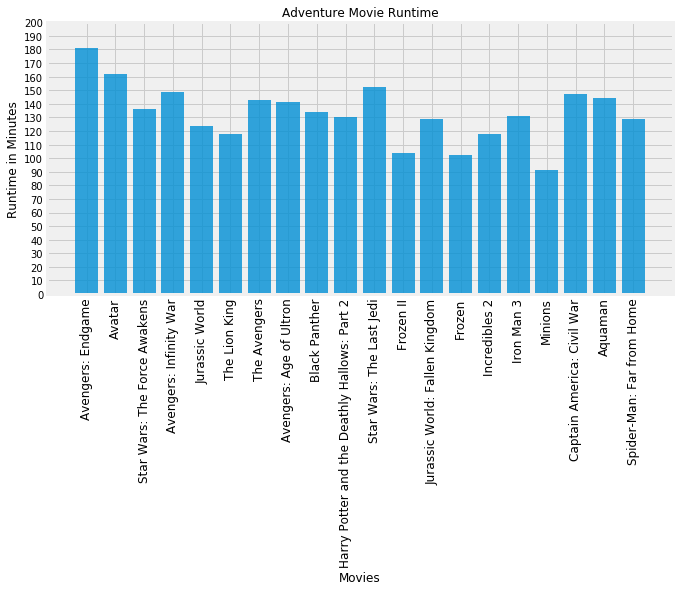

In [389]:
new_figure = plt.figure(figsize= (10,5))
objects = adv_run['title']
# y_pos = np.arange(len(objects))
runtime= adv_run['runtime']

plt.bar(objects, runtime, align='center', alpha=0.8)
plt.xticks(objects,rotation=90, rotation_mode="default",fontsize=12)
plt.yticks(np.arange(0, 210, step=10))
plt.ylabel('Runtime in Minutes',fontsize=12)
plt.xlabel('Movies',fontsize=12)
plt.title('Adventure Movie Runtime',fontsize=12)

plt.show()

In [390]:
#I am making a new datatframe from the dataframe dfcomedybudget but only accessing title and runtime
comrun = dfcomedybudget[['title','runtime']].head(20)
comrun

,title,runtime
0,Minions,91
1,Toy Story 4,100
2,Toy Story 3,103
3,Aladdin,128
4,Despicable Me 3,96
5,Finding Dory,97
6,Zootopia,109
8,Despicable Me 2,98
9,Jumanji: Welcome to the Jungle,119
10,Shrek 2,93


In [158]:
comrun['title']

0                                              Minions
1                                          Toy Story 4
2                                          Toy Story 3
3                                              Aladdin
4                                      Despicable Me 3
5                                         Finding Dory
6                                             Zootopia
8                                      Despicable Me 2
9                       Jumanji: Welcome to the Jungle
10                                             Shrek 2
11                      Ice Age: Dawn of the Dinosaurs
12                          Ice Age: Continental Drift
13                             The Secret Life of Pets
14                      Guardians of the Galaxy Vol. 2
15                                          Inside Out
16                                      Thor: Ragnarok
17                                                Coco
18                                     Shrek the Third
19    Pira

In [159]:
comrun['runtime']

0      91
1     100
2     103
3     128
4      96
5      97
6     109
8      98
9     119
10     93
11     94
12     88
13     87
14    137
15     95
16    131
17    105
18     93
19    129
20    108
Name: runtime, dtype: int64

In [160]:
comrun.describe()

,runtime
count,20.000000
mean,105.050000
std,15.503735
min,87.000000
25%,93.750000
50%,99.000000
75%,111.500000
max,137.000000


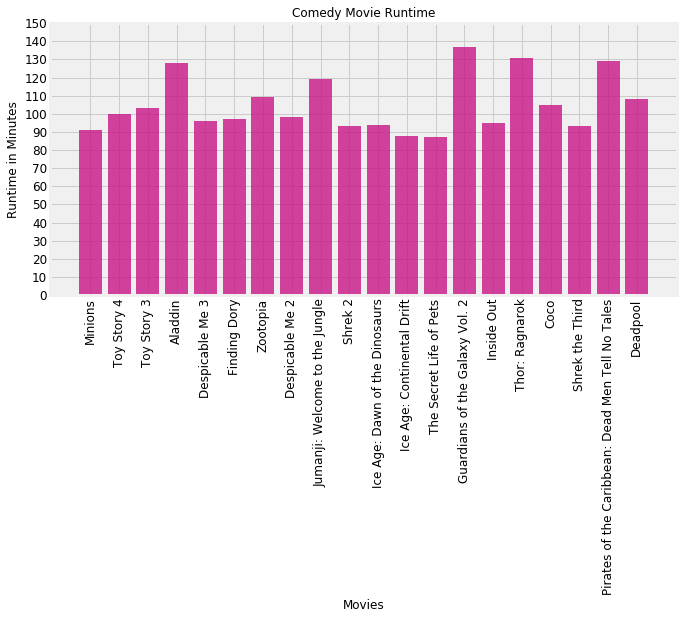

In [270]:
new_figure = plt.figure(figsize= (10,5))
objects = comrun['title']
# y_pos = np.arange(len(objects))
runtime= comrun['runtime']

plt.bar(objects, runtime, align='center', alpha=0.8,color='mediumvioletred')
plt.xticks(objects,rotation=90, rotation_mode="default",fontsize=12)
plt.yticks(np.arange(0, 160, step=10),fontsize=12)
plt.ylabel('Runtime in Minutes',fontsize=12)
plt.xlabel('Movies',fontsize=12)
plt.title('Comedy Movie Runtime',fontsize=12)

plt.show()